In [21]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from numpy.linalg import norm

from pathlib import Path
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
p = Path()
dataframe = pd.read_csv(p.joinpath(p.cwd(), 'extracted.csv'))

In [22]:
my_bullets = """Data Scientist
             Python, Pandas, machine learning, natural language processing
             Analyzed and visualized vast amounts of data using Pandas, Python, and Matplotlib.
             Berkeley / B.S. Mathematics
             Data Analyst"""
            

my_resume_dict = {'file': 'my_resume', 'title': 'Data Scientist', 'bullets': my_bullets}

my_resume_dataframe = pd.DataFrame(my_resume_dict, index=[0])
df_with_my_resume = dataframe.append(my_resume_dataframe, ignore_index=True)


In [23]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_bullet_matrix = tfidf_vectorizer.fit_transform(df_with_my_resume['bullets'])

In [27]:
tfidf_jobs = tfidf_bullet_matrix[:-1, :]
tfidf_my_resume = tfidf_bullet_matrix[-1:,:]

In [30]:
cos_sims = cosine_similarity(tfidf_jobs, tfidf_my_resume)

In [35]:
sorted_dataframe = dataframe.copy()
sorted_dataframe['cosine_similarity'] = cos_sims

In [38]:
sorted_dataframe.sort_values(by='cosine_similarity', ascending=False, inplace=True)
sorted_dataframe.reset_index(inplace=True, drop=True)

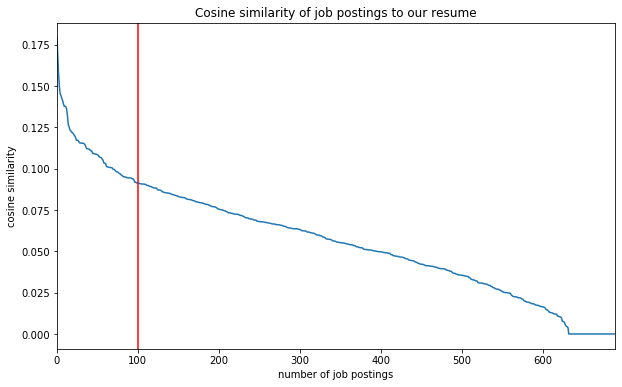

In [41]:
plt.figure(figsize=(10, 6))
sorted_dataframe['cosine_similarity'].plot()
plt.title('Cosine similarity of job postings to our resume')
plt.xlabel('number of job postings')
plt.ylabel('cosine similarity')
_ = plt.axvline(100, c='r')

In [48]:
most_similar_df = sorted_dataframe.iloc[0:100].copy()

In [52]:
most_similar_df[most_similar_df['title'].str.contains('data', case=False)].shape

(100, 4)

In [53]:
most_similar_df.to_pickle('most_similar.pk')